In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [18]:
#load the data
data = np.genfromtxt('self_driving_model.txt', delimiter=' ')
X = data[:, :4]
y = data[:, 4:]

In [19]:
def seq_model_to_sim(model):
    params = []
    model_shape = []
    for layer in model:
        if isinstance(layer, torch.nn.Linear):
            params.extend(layer.weight.data.numpy().reshape(-1).tolist())
            params.extend(layer.bias.data.numpy().reshape(-1).tolist())
            model_shape.append(layer.weight.shape[0])
    
    print("Model shape: {}".format(model_shape[:-1]))
    to_print = ""
    for b in params:
        to_print += "{:.4f},".format(b)
    print("Model weights: {}".format(to_print[:-1]))


In [20]:
#build an abstract model
model = torch.nn.Sequential(torch.nn.Linear(4,10),
                           torch.nn.ReLU(),
                           torch.nn.Linear(10, 10),
                           torch.nn.ReLU(),
                           torch.nn.Linear(10, 2))

In [21]:
#using Adam to optimize
loss_function = torch.nn.MSELoss()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [22]:
#Train the model
n_epochs = 100
batch_size = 64
losses = []
for epoch in range(n_epochs):
    
    # Slice random batch
    indices = np.random.randint(0, X.shape[0], batch_size)
    inp = torch.from_numpy(X[indices]).type(torch.FloatTensor)
    out = torch.from_numpy(y[indices]).type(torch.FloatTensor)
    
    # Forward prop
    preds = model.forward(inp)
    
    # Calculate Loss
    loss = loss_function(preds, out)
    losses.append(loss)
    
    # Backprop
    opt.zero_grad()
    loss.backward()
    opt.step()
    

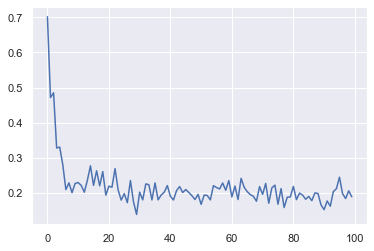

In [23]:
# Plot loss vs iters
epochs = np.arange(0, n_epochs, 1)
plt.plot(epochs, losses);

In [24]:
# Get model's parameters
seq_model_to_sim(model)

Model shape: [10, 10]
Model weights: -0.0774,0.1884,0.3383,-0.4333,-0.0886,0.3277,0.4875,0.3485,-0.1502,0.0605,0.3556,-0.1615,0.4703,-0.2504,0.0985,0.3285,0.3708,0.3776,-0.3916,-0.1691,-0.4578,-0.1190,0.4093,-0.2748,-0.1351,-0.1354,0.2458,-0.5215,-0.0951,0.3620,0.4298,0.4899,-0.3965,-0.1753,0.4549,0.0628,-0.1269,0.2907,-0.4443,-0.2814,-0.5081,-0.5089,0.2011,-0.4316,-0.2360,-0.1951,0.1709,0.3104,0.5069,-0.2222,0.2153,0.1661,-0.0971,-0.2088,0.1266,-0.0144,0.1552,-0.0143,-0.1485,0.2606,0.2096,-0.2462,-0.0886,0.0353,0.2419,-0.0830,-0.0977,-0.0267,0.1313,-0.1401,0.1568,-0.0867,0.1667,0.2557,0.2053,-0.1224,0.0123,-0.3238,0.1746,-0.2771,0.0449,0.2945,0.2078,0.2617,-0.1002,0.1042,0.1806,0.0110,0.1591,0.1147,0.1991,-0.0936,-0.0573,0.1845,-0.1600,0.2277,0.0815,0.0458,0.1351,-0.0934,0.2589,0.2633,-0.1946,0.2325,0.0135,0.2170,0.1699,-0.2310,-0.0615,0.2948,-0.2338,-0.2283,-0.1250,0.0781,0.1710,-0.3054,-0.1656,0.0951,0.0239,-0.1293,-0.0460,0.0028,0.2872,-0.0681,0.1365,0.2997,0.2118,-0.0294,0.0363,-0

0=ReLU, 1=None, 2=ReLU
4, 10, 10, 10, 2